In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [3]:
df = pd.read_csv("Обезличенные данные.csv", delimiter=";")
df['time'] = pd.to_datetime(df['time'], unit='ms')

In [4]:
df

,id,user_id,tracker_id,type,value,sys,dia,time
0,38b85172-a353-40f0-afbe-c484c4a7d10a,dc7a7473-b06c-4571-b8b6-8a72077c5a79,NaN,Steps,16447.0,NaN,NaN,2024-08-06 20:55:16
1,a762a7ec-0627-487f-b5b7-a741693e5f68,dc7a7473-b06c-4571-b8b6-8a72077c5a79,NaN,Glucose,6.9,NaN,NaN,2024-08-06 20:55:16
2,2ae155d9-28ae-4a62-a10c-81480893647c,dc7a7473-b06c-4571-b8b6-8a72077c5a79,NaN,Temperature,36.5,NaN,NaN,2024-08-06 21:05:27
3,ca947e2c-72f6-4b68-856e-595fa8964b15,dc7a7473-b06c-4571-b8b6-8a72077c5a79,NaN,Pulse,90.0,NaN,NaN,2024-08-06 21:05:27
4,6a77efe9-8482-4dd6-875c-b188e2e894be,dc7a7473-b06c-4571-b8b6-8a72077c5a79,NaN,Breath,18.0,NaN,NaN,2024-08-06 21:05:27
...,...,...,...,...,...,...,...,...
4763036,b5d3ed60-f845-4e04-8a95-d98a4fe1e93b,dc7a7473-b06c-4571-b8b6-8a72077c5a79,NaN,Glucose,6.9,NaN,NaN,2024-08-06 20:50:18
4763037,28a7cd7d-e0bf-4021-ac98-23bf564fa2f9,dc7a7473-b06c-4571-b8b6-8a72077c5a79,NaN,BloodPressure,NaN,104.0,66.0,2024-08-06 20:50:18
4763038,532f5d61-abc5-48b8-ae9d-3efad14da5a8,dc7a7473-b06c-4571-b8b6-8a72077c5a79,NaN,Temperature,36.5,NaN,NaN,2024-08-06 20:55:16
4763039,f2fe1e0b-3dcf-43ea-a2fe-0d8c94575b4c,dc7a7473-b06c-4571-b8b6-8a72077c5a79,NaN,Pulse,77.0,NaN,NaN,2024-08-06 20:55:16


sys - Систолическое давление это максимальное давление в артериях в момент, когда сердце сжимается и выталкивает кровь в артерии  
dia - Диастолическое давление показывает давление в артериях в момент расслабления сердечной мышцы, оно отражает сопротивление периферических сосудов  
Oxygenation - обогощение кислородом в процентах


In [5]:
datatime_uniq_vals = np.unique(df["time"])

In [6]:
datatime_uniq_vals.shape

(384991,)

In [7]:
data_values_type = np.unique(df["type"])

In [8]:
uniq_user_id = np.unique(df["user_id"])

In [9]:
uniq_user_id.shape

(1098,)

In [10]:
data_values_type

array(['Adoptability', 'Age', 'AvgPulse', 'BloodPressure', 'Breath',
       'EDA', 'Ecg', 'Glucose', 'Neuroplasticity', 'Oxygenation', 'Pulse',
       'Steps', 'Temperature', 'Vitality'], dtype=object)

In [11]:
bad_data = ['Age', 'EDA', 'Ecg', 'Vitality', 'Neuroplasticity', 'Adoptability', 'Steps', 'Breath']
bio_data_values_type = [data for data in data_values_type if data not in bad_data+['BloodPressure']]

In [12]:
bio_data_values_type

['AvgPulse', 'Glucose', 'Oxygenation', 'Pulse', 'Temperature']

In [13]:
df_bloodpressure = df[['sys', 'dia', 'time']].groupby('time').agg('mean').dropna()
df_bloodpressure

,sys,dia
time,,
2019-12-31 23:40:24,113.0,76.0
2019-12-31 23:50:00,112.0,74.0
2020-01-01 00:20:35,107.0,70.0
2020-01-01 01:30:35,115.0,77.0
2020-01-01 01:40:25,115.0,75.0
...,...,...
2024-10-25 07:10:31,105.0,66.0
2024-10-25 07:20:21,103.0,69.0
2024-10-25 07:20:35,105.0,67.0


In [14]:
pivot_df = df.pivot_table(index='time', columns='type', values='value', aggfunc='mean')
df_bio = pivot_df[bio_data_values_type].dropna()
df_bio

type,AvgPulse,Glucose,Oxygenation,Pulse,Temperature
time,,,,,
2024-03-11 20:38:03.456,90.00,8.00,5.00,82.00,36.60
2024-03-11 20:38:03.686,93.00,7.00,6.00,88.00,36.70
2024-03-11 20:38:03.814,89.00,5.00,5.00,90.00,36.60
2024-03-11 20:38:03.941,87.00,6.00,6.00,87.00,36.50
2024-03-11 20:38:04.066,83.00,5.00,7.00,93.00,36.80
...,...,...,...,...,...
2024-05-21 20:43:39.568,502.55,4.02,97.92,71.78,37.94
2024-05-21 20:48:39.612,504.73,4.24,97.36,76.24,37.15
2024-05-21 20:53:39.653,506.13,4.19,97.43,75.85,36.01


In [15]:
df_bio = df_bio[df_bio['AvgPulse']<=(df_bio['AvgPulse'].mean()+3*df_bio['AvgPulse'].std())]
df_bio

type,AvgPulse,Glucose,Oxygenation,Pulse,Temperature
time,,,,,
2024-03-11 20:38:03.456,90.0,8.0,5.0,82.0,36.6
2024-03-11 20:38:03.686,93.0,7.0,6.0,88.0,36.7
2024-03-11 20:38:03.814,89.0,5.0,5.0,90.0,36.6
2024-03-11 20:38:03.941,87.0,6.0,6.0,87.0,36.5
2024-03-11 20:38:04.066,83.0,5.0,7.0,93.0,36.8
...,...,...,...,...,...
2024-03-12 00:07:23.652,95.0,8.0,5.0,97.0,36.5
2024-03-12 00:07:24.372,85.0,6.0,7.0,80.0,36.8
2024-03-12 00:07:25.823,82.0,6.0,7.0,90.0,36.8


In [15]:
for dtype in bio_data_values_type:
    print(f"{dtype}: Min-{df_bio[dtype].min()}, Mean-{df_bio[dtype].mean()}, Std-{df_bio[dtype].std()}, Max-{df_bio[dtype].max()}")

AvgPulse: Min-80.0, Mean-89.4893450927633, Std-5.759162561382705, Max-99.0
Glucose: Min-5.0, Mean-6.50328311768842, Std-1.1160478488712084, Max-8.0
Oxygenation: Min-5.0, Mean-7.003222216685767, Std-1.411395216064218, Max-9.0
Pulse: Min-80.0, Mean-89.49363861345026, Std-5.758756116712645, Max-99.0
Temperature: Min-36.5, Mean-36.6500415234109, Std-0.11166142670694705, Max-36.8


C:\Users\Braham\AppData\Local\Temp\ipykernel_25132\1998114573.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


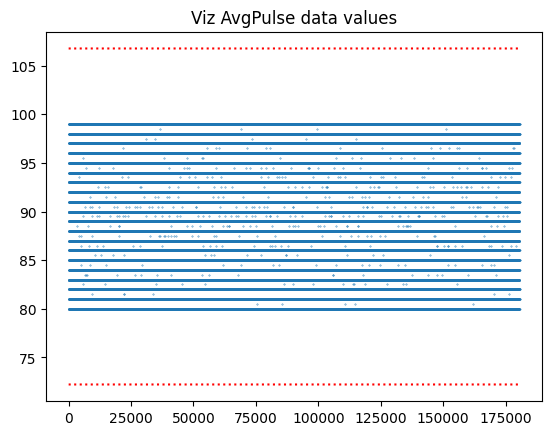

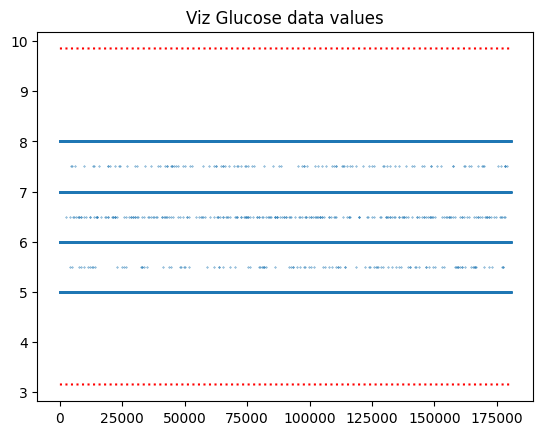

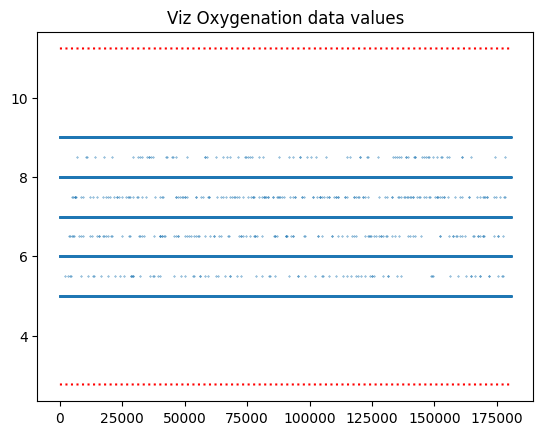

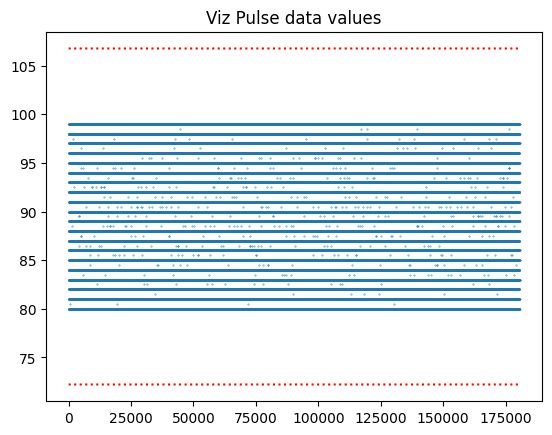

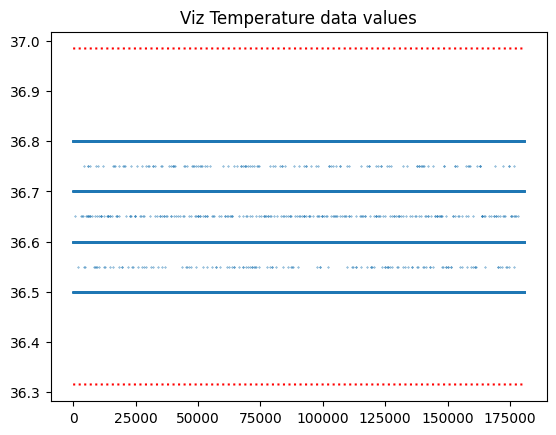

In [49]:
#fast fiz for anomaly
for dtype in bio_data_values_type:
    y = df_bio[dtype].values
    x = np.arange(0, y.shape[0])
    y_t = np.zeros_like(y)+df_bio[dtype].mean()+3*df_bio[dtype].std()
    y_b = np.zeros_like(y)+df_bio[dtype].mean()-3*df_bio[dtype].std()
    
    fig = plt.figure()

    ax = fig.add_subplot(111)

    ax.scatter(x,y, s=0.1)
    ax.plot(x, y_t, linestyle="dotted", c='r')
    ax.plot(x, y_b, linestyle="dotted", c='r')

    ax.set_title(f"Viz {dtype} data values")

    fig.show()

# clustering by bio data

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, HDBSCAN, AffinityPropagation, AgglomerativeClustering, OPTICS, KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [17]:
pca = PCA(2)
pca_data = pca.fit_transform(df_bio)
pca_data = StandardScaler().fit_transform(pca_data)

In [18]:
pca_data.shape

(180621, 2)

In [19]:
first_feature = pca_data[:, 0]
second_feature = pca_data[:, 1]

Text(0, 0.5, 'second_feature')

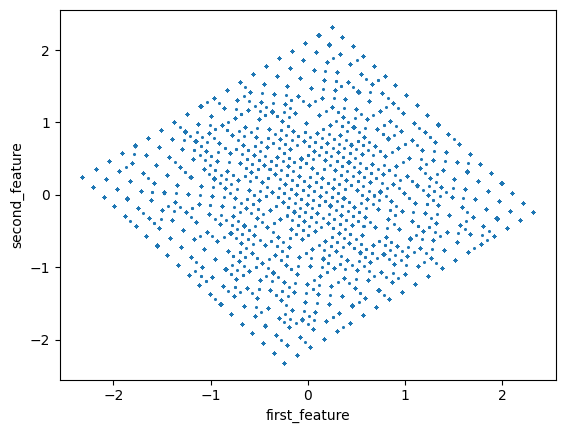

In [20]:
plt.scatter(first_feature, second_feature, s=1.5)
plt.xlabel('first_feature')
plt.ylabel('second_feature')

In [65]:
models = [KMeans(n_clusters=20), DBSCAN(eps=0.5), HDBSCAN(), OPTICS(), AffinityPropagation(), AgglomerativeClustering()] #AffinityPropagation()

In [66]:
models[1].fit(pca_data)
labels = models[1].labels_
uniq_labels = np.unique(labels)

In [50]:
uniq_labels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int32)

In [70]:
np.unique(labels)

array([0, 1, 2, 3], dtype=int32)

In [71]:
data

{1: (np.float64(0.40987165274329884),
  np.float64(0.764714152885398),
  np.float64(181816.7186442087))}

In [72]:
def wcss_score(X, labels):
    total_wcss = 0
    unique_labels = np.unique(labels)
    
    for cluster_label in unique_labels:
        cluster_indexes = np.where(labels == cluster_label)[0]
        total_wcss += np.sum(np.linalg.norm(np.mean(X[cluster_indexes], axis=0) - X[cluster_indexes], axis=1))
    
    return total_wcss / len(unique_labels)

In [74]:
data = dict()
for i in tqdm(range(2, 6)):
    model = KMeans(n_clusters=i)
    model.fit(pca_data)
    labels = model.labels_
    data[i] = (wcss_score(pca_data, labels), silhouette_score(pca_data, labels), davies_bouldin_score(pca_data, labels), calinski_harabasz_score(pca_data, labels))

  0%|          | 0/4 [00:00<?, ?it/s]

In [75]:
data

{2: (np.float64(92770.15543088446),
  np.float64(0.35447074527002564),
  np.float64(1.185171587631968),
  np.float64(108657.13225419747)),
 3: (np.float64(49273.0655340165),
  np.float64(0.37401045396907867),
  np.float64(0.8751563378854286),
  np.float64(136266.61916926337)),
 4: (np.float64(29884.168248921298),
  np.float64(0.4098714503615065),
  np.float64(0.7647150647438437),
  np.float64(181816.72046932357)),
 5: (np.float64(21993.255473176803),
  np.float64(0.37937165756113445),
  np.float64(0.8892362774172735),
  np.float64(167024.94279950365))}

In [87]:
data = dict()
for i in tqdm(range(2, 10)):
    km = KMeans(n_clusters=i)
    km.fit(pca_data)
    labels = km.labels_
    data[i] = (silhouette_score(pca_data, labels), davies_bouldin_score(pca_data, labels), calinski_harabasz_score(pca_data, labels))

  0%|          | 0/8 [00:00<?, ?it/s]

In [90]:
data_new = data

In [93]:
x = (data_new.keys())
x

dict_keys([2, 3, 4, 5, 6, 7, 8, 9])

In [94]:
data_new

{2: (np.float64(0.3544707499820802),
  np.float64(1.1851716144990918),
  np.float64(108657.13226353002)),
 3: (np.float64(0.377074494375812),
  np.float64(0.8680092801902516),
  np.float64(137605.51718310817)),
 4: (np.float64(0.4098714503615033),
  np.float64(0.7647150647438484),
  np.float64(181816.72046932208)),
 5: (np.float64(0.3800219764022761),
  np.float64(0.8885704920306615),
  np.float64(167264.2343690494)),
 6: (np.float64(0.3681333108447025),
  np.float64(0.8790218652788804),
  np.float64(165012.8020612015)),
 7: (np.float64(0.36897400956007537),
  np.float64(0.8046244560223462),
  np.float64(167965.37440722334)),
 8: (np.float64(0.3696885955491825),
  np.float64(0.7826320710000654),
  np.float64(171503.22557197182)),
 9: (np.float64(0.34496273779132564),
  np.float64(0.9004014635659858),
  np.float64(165211.68796810647))}

In [95]:
data = []
for key in x:
    data.append([data_new[key][0], data_new[key][1], data_new[key][2]])

data = np.array(data)
data

array([[3.54470750e-01, 1.18517161e+00, 1.08657132e+05],
       [3.77074494e-01, 8.68009280e-01, 1.37605517e+05],
       [4.09871450e-01, 7.64715065e-01, 1.81816720e+05],
       [3.80021976e-01, 8.88570492e-01, 1.67264234e+05],
       [3.68133311e-01, 8.79021865e-01, 1.65012802e+05],
       [3.68974010e-01, 8.04624456e-01, 1.67965374e+05],
       [3.69688596e-01, 7.82632071e-01, 1.71503226e+05],
       [3.44962738e-01, 9.00401464e-01, 1.65211688e+05]])

In [96]:
data.shape

(8, 3)

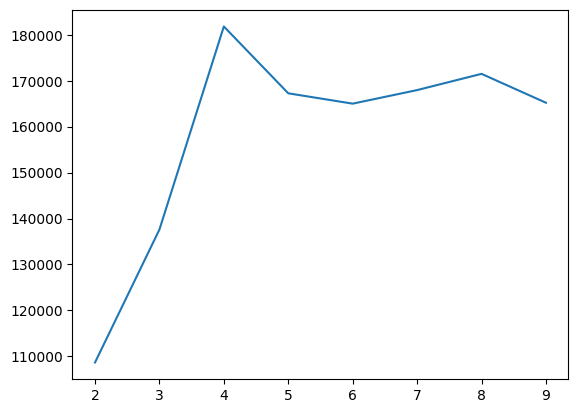

In [98]:
# plt.plot(x, data[:, 0], label='silhouette_score')
# plt.plot(x, data[:, 1], label='davies_bouldin_score')
# plt.legend()
plt.plot(x, data[:, 2])

  0%|          | 0/4 [00:00<?, ?it/s]

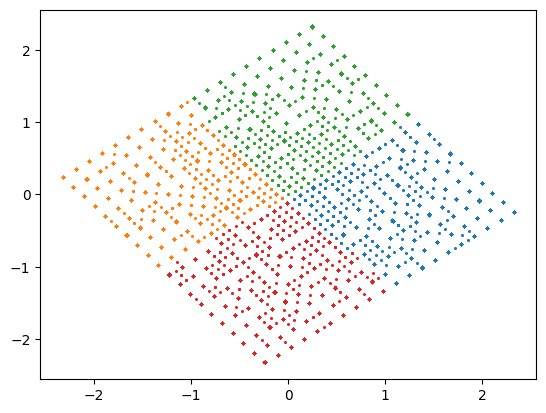

In [21]:
km = KMeans(n_clusters=4)
km.fit(pca_data)
labels = km.labels_
uniq_labels = np.unique(labels)

for val in tqdm(uniq_labels):
    data = pca_data[labels==val]
    plt.scatter(data[:, 0], data[:, 1], s=1.5)

In [ ]:
for model in tqdm(models):
    model.fit(X_train)
    labels = model.labels_
    print(f"{model.__class__.__name__} \nNum clusters: {len(np.unique(labels))} \nSilhouette metric: {silhouette_score(X_train, labels)}")

In [79]:
labels_db = db.labels_
labels_hdb = hdb.labels_
print(len(np.unique(labels_db)))
print(len(np.unique(labels_hdb)))

81
22031


In [81]:
n_clusters_ = len(set(labels_db)) - (1 if -1 in labels_db else 0)
n_noise_ = list(labels_db).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 80
Estimated number of noise points: 854


In [22]:
df = df_bio.assign(cls=labels)

In [23]:
df_labels = ['AvgPulse', 'Glucose', 'Oxygenation', 'Pulse', 'Temperature']

In [24]:
df

type,AvgPulse,Glucose,Oxygenation,Pulse,Temperature,cls
time,,,,,,
2024-03-11 20:38:03.456,90.0,8.0,5.0,82.0,36.6,2
2024-03-11 20:38:03.686,93.0,7.0,6.0,88.0,36.7,2
2024-03-11 20:38:03.814,89.0,5.0,5.0,90.0,36.6,3
2024-03-11 20:38:03.941,87.0,6.0,6.0,87.0,36.5,1
2024-03-11 20:38:04.066,83.0,5.0,7.0,93.0,36.8,3
...,...,...,...,...,...,...
2024-03-12 00:07:23.652,95.0,8.0,5.0,97.0,36.5,0
2024-03-12 00:07:24.372,85.0,6.0,7.0,80.0,36.8,1
2024-03-12 00:07:25.823,82.0,6.0,7.0,90.0,36.8,3


# Classification

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score

import seaborn as sns

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [29]:
X, y = df[df_labels].values, df['cls'].values

In [30]:
X_standarted = StandardScaler().fit_transform(X)
X_standarted

array([[ 0.0886685 ,  1.34109037, -1.41932447, -1.30126354, -0.44815532],
       [ 0.60957901,  0.44506896, -0.71080374, -0.25936899,  0.44741158],
       [-0.08496833, -1.34697386, -1.41932447,  0.08792919, -0.44815532],
       ...,
       [-1.30042619, -0.45095245, -0.00228301,  0.08792919,  1.34297847],
       [-0.60587884,  1.34109037, -0.71080374,  1.47712193, -0.44815532],
       [-1.47406303, -0.45095245, -0.00228301, -0.78031626,  0.44741158]])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_standarted, y, test_size=0.3, random_state=33)

In [32]:
X_train.shape, X_test.shape

((126434, 5), (54187, 5))

In [33]:
def report_about_pred(target, predicted):
    #target_names = ['work', 'nowork', 'walk'], target_names=target_names
    print('----accuracy_score----')
    print(accuracy_score(target, predicted))
    print('----classification_report----')
    print(classification_report(target, predicted))

    ax = plt.subplot()
    disp = ConfusionMatrixDisplay.from_predictions(target, predicted, ax=ax, xticks_rotation=45)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')

In [34]:
dt = DecisionTreeClassifier(random_state=33)

In [35]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=33)

In [36]:
pred = dt.predict(X_test)

----accuracy_score----
0.9999446361673464
----classification_report----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13421
           1       1.00      1.00      1.00     13601
           2       1.00      1.00      1.00     13500
           3       1.00      1.00      1.00     13665

    accuracy                           1.00     54187
   macro avg       1.00      1.00      1.00     54187
weighted avg       1.00      1.00      1.00     54187



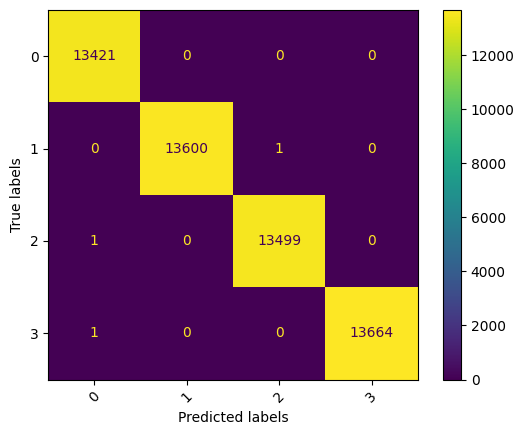

In [37]:
report_about_pred(y_test, pred)

In [38]:
rf = RandomForestClassifier(random_state=33)

In [39]:
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

----accuracy_score----
0.9999261815564618
----classification_report----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13421
           1       1.00      1.00      1.00     13601
           2       1.00      1.00      1.00     13500
           3       1.00      1.00      1.00     13665

    accuracy                           1.00     54187
   macro avg       1.00      1.00      1.00     54187
weighted avg       1.00      1.00      1.00     54187



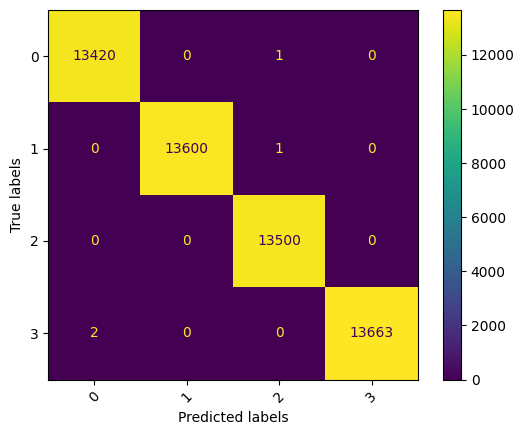

In [40]:
report_about_pred(y_test, pred)

# Анализ классов и их взаимосвязь с глюкозой

In [41]:
df

type,AvgPulse,Glucose,Oxygenation,Pulse,Temperature,cls
time,,,,,,
2024-03-11 20:38:03.456,90.0,8.0,5.0,82.0,36.6,2
2024-03-11 20:38:03.686,93.0,7.0,6.0,88.0,36.7,2
2024-03-11 20:38:03.814,89.0,5.0,5.0,90.0,36.6,3
2024-03-11 20:38:03.941,87.0,6.0,6.0,87.0,36.5,1
2024-03-11 20:38:04.066,83.0,5.0,7.0,93.0,36.8,3
...,...,...,...,...,...,...
2024-03-12 00:07:23.652,95.0,8.0,5.0,97.0,36.5,0
2024-03-12 00:07:24.372,85.0,6.0,7.0,80.0,36.8,1
2024-03-12 00:07:25.823,82.0,6.0,7.0,90.0,36.8,3


In [42]:
uniq_cls = np.unique(df['cls'])
uniq_cls

array([0, 1, 2, 3], dtype=int32)

In [45]:
data = df[['Glucose', 'cls']].values

In [61]:
gluc_data = df_bio['Glucose'].values

In [47]:
data[np.where(data[:, 1]==0)]

array([[5., 0.],
       [5., 0.],
       [8., 0.],
       ...,
       [5., 0.],
       [5., 0.],
       [8., 0.]])

In [ ]:
#нужно 2 и 3 класс объединить они одинаковы

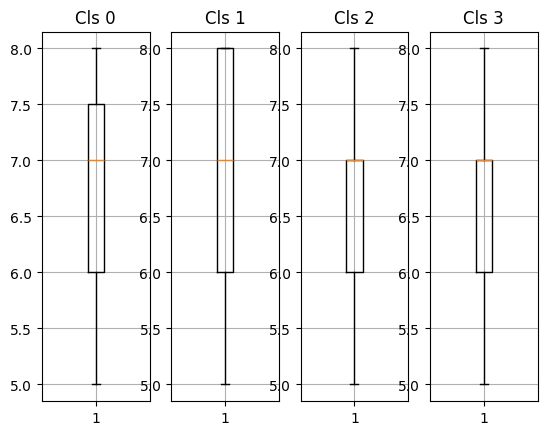

In [64]:
fig, ax = plt.subplots(1, len(uniq_cls))

for i in uniq_cls:
    temp = gluc_data[np.where(data[:, 1]==i)]
    ax[i].boxplot(temp)
    ax[i].set_title(f'Cls {i}')
    ax[i].grid()